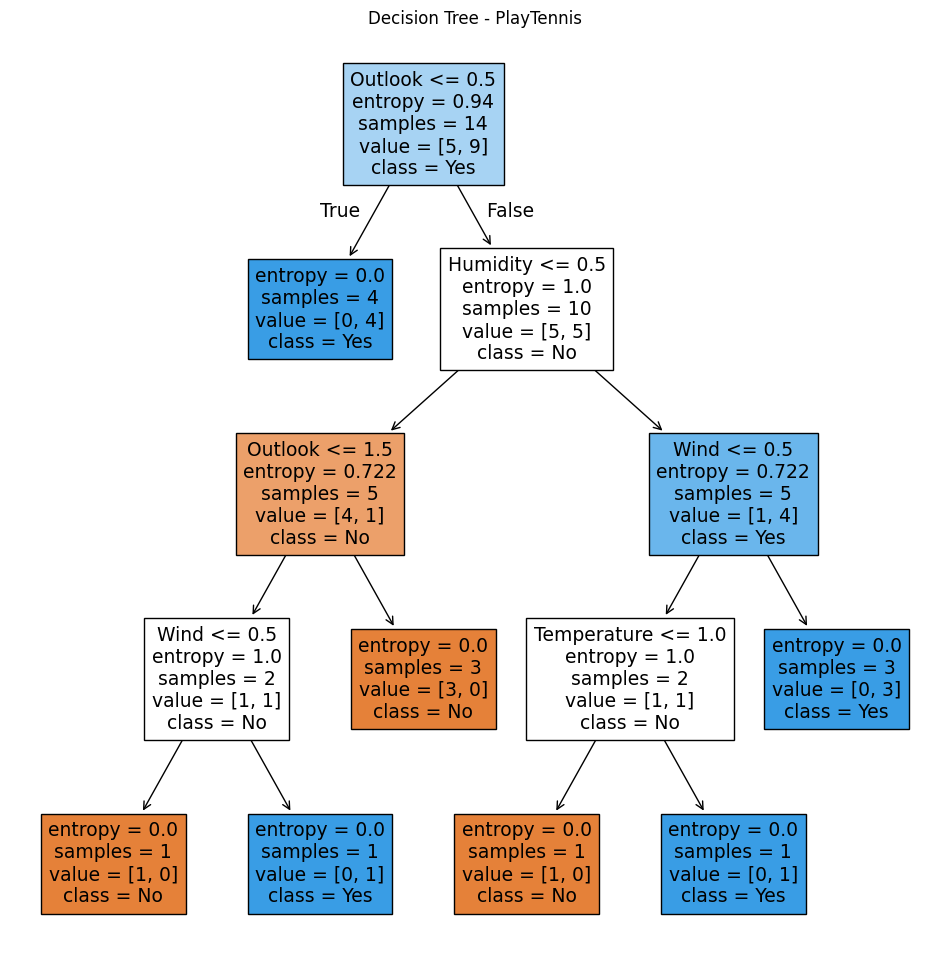

Confusion Matrix:
[[5 0]
 [0 9]]

Metrics:
Accuracy     = 1.00
Precision    = 1.00
Sensitivity  = 1.00
Specificity  = 1.00
F1 Score     = 1.00
SPB (J-index)= 1.00


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# داده‌ها
data = {
    'Outlook':    ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature':['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity':   ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind':       ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# تبدیل داده‌های متنی به عددی
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# ویژگی‌ها و خروجی
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

# ساخت مدل
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

# پیش‌بینی روی همان داده‌ها (برای سادگی، cross-validation استفاده نکردیم)
y_pred = model.predict(X)

# محاسبه confusion matrix
cm = confusion_matrix(y, y_pred)
TN, FP, FN, TP = cm.ravel()

# محاسبه معیارها
accuracy    = accuracy_score(y, y_pred)
precision   = precision_score(y, y_pred)
recall      = recall_score(y, y_pred)  # همان sensitivity
specificity = TN / (TN + FP)
f1          = f1_score(y, y_pred)
spb         = recall + specificity - 1

# نمایش درخت
plt.figure(figsize=(12, 12))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree - PlayTennis")
plt.show()

# نمایش نتایج
print("Confusion Matrix:")
print(cm)
print("\nMetrics:")
print(f"Accuracy     = {accuracy:.2f}")
print(f"Precision    = {precision:.2f}")
print(f"Sensitivity  = {recall:.2f}")
print(f"Specificity  = {specificity:.2f}")
print(f"F1 Score     = {f1:.2f}")
print(f"SPB (J-index)= {spb:.2f}")
